## Introduction

In this guided project, we'll extend the work we did in the last two missions on visualizing the gender gap across college degrees. So far, we mostly focused on the STEM degrees but now we will generate line charts to compare across all degree categories. In the last step of this guided project, we'll explore how to export the final diagram we create as an image file.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

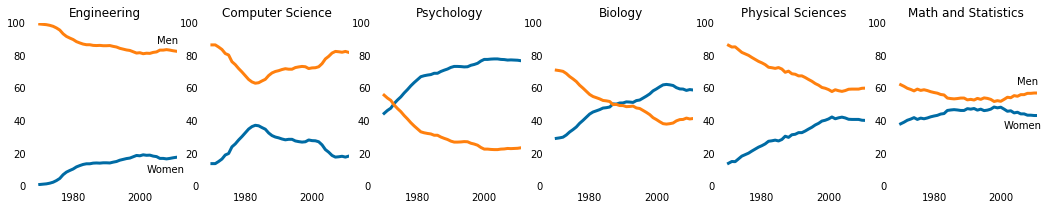

In [2]:
women_degrees = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255,128/255,14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18,3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100 - women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    if sp == 0:
        ax.text(2005, 87, "Men")
        ax.text(2002, 8, "Women")
    elif sp == 5:
        ax.text(2005, 62, "Men")
        ax.text(2001, 35, "Women")
        
plt.show()

### Comparing across all degrees

Because there are seventeen degrees that we need to generate line charts for, we'll use a subplot grid layout of 6 rows by 3 columns. We can then group the degrees into STEM, liberal arts, and other, in the following way:
```
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
```
Here's what the diagram will look like:

<img src="_images/149_comparing_across_categories.png" />

While the `stem_cats` list was ordered by ending gender gap, all three of these lists are ordered in descending order by the percentage of degrees awarded to women. While `stem_cats` and `other_cats` have six degree categories as elements, `lib_arts_cats` only has five. We'll need to not only modify the for loop to generate the STEM line charts that we wrote but also add two new for loops to generate the line charts for liberal arts degrees and for other degrees.